# Проект по принятию решений в бизнесе

# Введение

<b> Название: </b> Приоритизация гипотез по увеличению выручки и проведение A/В тестов для выявления результатов нововведений.

<b> Краткое описание: </b>  Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

<b> Цели и задачи: </b> 

 1.Приоритизация задач
 
 2.Анализ A/B-теста


<b> Описание исходных данных:</b>  В распоряжении имеется три датасета.

Файл /datasets/hypothesis.csv.:

Структура датасета:

    Hypothesis — краткое описание гипотезы;
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv.

Структура датасета:

    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.
    
Файл /datasets/visitors.csv. 

Структура датасета:

    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста

<b> План (декомпозиция) анализа данных: </b> 
    
    Цель 1: Приоритизация задач
    - Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
    - Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
    - Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним причины.
    Цель 2: Анализ A/B-теста
    - Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
    - Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
    - Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
    - Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.
    - Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.
    - Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.
    - Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
    - Построим точечный график стоимостей заказов. Сделаем выводы и предположения.
    - Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
    - Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.
    - Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
    - Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.
    - Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.
    - Примим решение по результатам теста

In [340]:
#импортируем необходимые библиотеки
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [341]:
#загружаем датасеты
hypothesis=pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visits = pd.read_csv('/datasets/visitors.csv')

In [342]:
#предварительный просмотр датасетов
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [343]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [344]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропусков нет!

Однако для лучшей работы с датами нужно перевести столбцы date из типа object в datetime

In [345]:
orders['date']=pd.to_datetime(orders['date'])

In [346]:
visits['date']=pd.to_datetime(visits['date'])

In [347]:
#проверяем на дубликаты
hypothesis.duplicated().sum()

0

In [348]:
visits.duplicated().sum()

0

In [349]:
orders.duplicated().sum()

0

Дубликатов также не имеется

In [350]:
#приводим заголовки колонок к нижнему змеиному регистру
hypothesis.rename(columns = {'Hypothesis':'hypothesis', 'Reach':'reach', 'Impact':'impact', 'Confidence':'confidence', 'Efforts':'efforts'}, inplace = True )

In [351]:
orders.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace = True )

Предобработка завершена!!!

## Приоритизация гипотез

### Приоритизация и сортировка гипотез согласно фреймворку ICE

In [352]:
hypothesis['ice'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']

In [353]:
hypothesis = hypothesis.sort_values(by='ice', ascending=False)

In [354]:
hypothesis['hypothesis'].unique()

array(['Запустить акцию, дающую скидку на товар в день рождения',
       'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей'],
      dtype=object)

In [355]:
hypothesis['ice']=round(hypothesis['ice'],2)

In [356]:
#отсортированная по фреймворку ICE таблица гипотез
hypothesis

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


###  Приоритизация и сортировка гипотез согласно фреймворку RICE

In [357]:
hypothesis['rice'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']

In [358]:
hypothesis=hypothesis.sort_values(by='rice', ascending=False)

In [359]:
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


<b> Микровывод: </b> Порядок гипотез в таблице, отсортированной по rice заметно изменился. Несмотря на то что индекс RICE оперирует теми же переменными, что и индекс ICE, отличаясь лишь одной дополнительной - REACH, оба являются мультипликативными (построенными на операции умножения). Это значит: каждая новая переменная может кардинально изменить результат и порядок гипотез, что мы и наблюдаем в нашем примере: являясь первой по индексу ICE гипотеза 'Запустить акцию, дающую скидку на товар в день рождения' спустилась вниз из-за крайне низкого показателя REACH, а гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"  благодаря заметному преимуществу в данном показателе поднялась.

## Анализ A/B-теста

### Строим и анализируем график кумулятивной выручки по группам

In [360]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [361]:
#Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates
datesGroups = orders[['date','group']].drop_duplicates() 

In [362]:
#Соберём агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [363]:
ordersAggregated.rename(columns = {'transaction_id':'count_transactions', 'visitor_id':'count_buyers'}, inplace=True)

In [364]:
visits

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [365]:
# Соберем агрегированные кумулятивные по дням данные о посетителях интернет-магазина аналогичным способом
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], \
    visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}),\
                                       axis=1).sort_values(by=['date','group']) 

In [366]:
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [367]:
# проверяем сколько посетителей из группы А также попадают в группу B
orders[orders['group']=='A']['visitor_id'].isin(orders[orders['group']=='B']['visitor_id']).sum()

89

In [368]:
# проверяем сколько посетителей из группы B также попадают в группу A
orders[orders['group']=='B']['visitor_id'].isin(orders[orders['group']=='A']['visitor_id']).sum()

92

В группе B больше совпадений чем в группе A так как в группе B есть пользователи, которые несколько раз попали в группу B и один или несколько раз в группу A, соответсвенно True в группе B больше.

В итоге, мы понимаем, что некоторые пользователи попали в трафик группы A и в трафик группы B при проведение A/B теста. Однако не вижу здесь проблемы, так как покупки они каждый раз совершали разные.

In [369]:
# объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [370]:
cumulativeData.head(5)

,date,group,count_transactions,count_buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


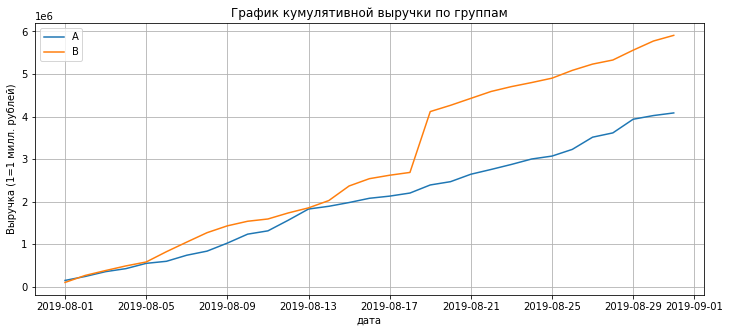

In [371]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'count_transactions']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'count_transactions']]
plt.figure(figsize=(12, 5))
# Строим график выручки группы A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A');

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B');
plt.grid()
plt.xlabel('дата')
plt.ylabel('Выручка (1=1 милл. рублей)')
plt.title('График кумулятивной выручки по группам')
plt.legend();
plt.show()

<b> Микровывод: </b> Выручка почти равномерно увеличивается в течение всего теста.
Однако график выручки группы B после 17 августа резко скакнул. Это может свидетельствовать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке, либо об ином изменение, но после данного всплеска график рос в своем естественном темпе. График A стабильно рос все время без всплесков и к 1 сентября объем накопленной выручки серьезно уступал группе B.

### Строим и анализируем график кумулятивного среднего чека по группам

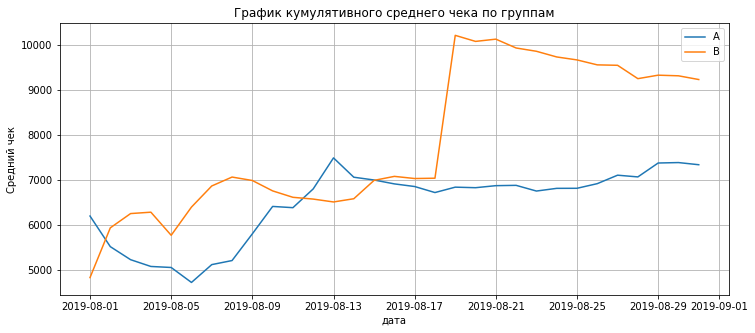

In [372]:
plt.figure(figsize=(12, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['count_transactions'], label='A');
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['count_transactions'], label='B');
plt.grid()
plt.title('График кумулятивного среднего чека по группам');
plt.xlabel('дата')
plt.ylabel('Средний чек')
plt.legend();

<b>Микровывод: </b>График свидетельствует о долгой стабилизации среднего чека - полмесяца. Ближе к концу график отличается большей равномерностью. На данном графике также мы можем наблюдать скачок среднего чека группы B после 17 августа, что свидетельсвует о наличие очень дорогих заказов, а не их большом количестве (как мы могли предположить после предыдушего графика). После 17ого средний чек группы B достигает 10000, позже постеенно снижаясь до 9100, что говорит о постепенном растворение эффекта дорогих покупок после 17ого. Исходя из этого, можно предположить что средний чек группы B в дальнейшем будет снижаться. Быстрый равномерный рост наблюдается и у группы A с 6 августа по 13 августа, который после нейтрализуется. Предположу, что данный рост можно вполне списать на попадание дорогих заказов в первую половину теста в группу A, а не на какие-то реальный процессы. Подводя промежуточный итог, надо сказать, что тест рано останавливать так как несмотря на огромное преимущество группы B, мы не знаем насколько оно обязано тем аномально дорогим заказам после 17ого и какой реальный чек будет после нейтрализации данного эффекта, потому что до него группа A и B шли без большого разрыва. В конце графика можно заметить постепенное сближение двух линий, что также свидетельствует о необходимости продолжить тест. Важно, нарисовать еще ряд графиков и провести тест Манна-Уитни для окончатеьного вердикта.

### Строим и анализируем график относительного изменения кумулятивного среднего чека группы B к группе A.

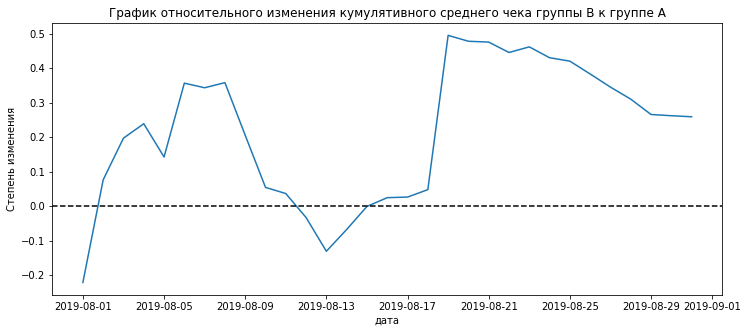

In [373]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['count_transactionsB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['count_transactionsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A');
plt.xlabel('дата');
plt.ylabel('Cтепень изменения');

<b>Микровывод: </b> Данный график лишь подтверждает предположения, сделанные на основе предыдущего. Эффект дорогих заказов после 17 серьезно поднимает средние чеки и относительная разница становится огромной. Но уже к началу сентября средний чек B опережает A лишь на 0.3, что говорит о стремление графика B к своему естественному состоянию, которое, скорее всего, не сильно отличается от графика A, так как до 17 августа график B даже где-то устпал графику A, однако делать серьезные выводы на основе первой половины графика опасно в силу малой величины выборки и нестаблиности графиков.

### Строим и анализируем график кумулятивного среднего количества заказов на посетителя по группам

In [374]:
cumulativeData

,date,group,count_transactions,count_buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


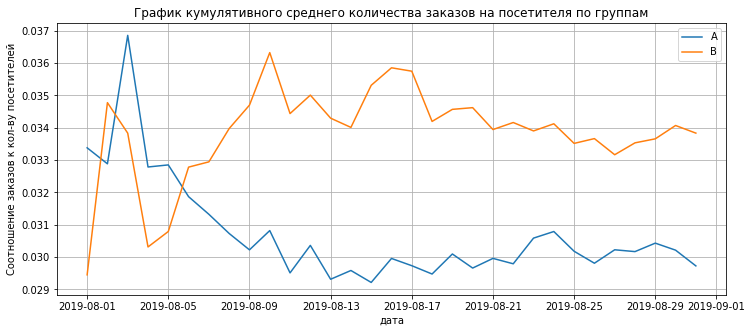

In [375]:
# датафрейм с кумулятивным количеством заказов и кумулятивным количеством посетителей по дням в группе А
cumulativeVisitorsA = cumulativeData[cumulativeData['group']=='A'][['date','visitors', 'count_transactions']]

# датафрейм с кумулятивным количеством заказов и кумулятивным количеством посетителей по дням в группе B
cumulativeVisitorsB = cumulativeData[cumulativeData['group']=='B'][['date','visitors', 'count_transactions']]

plt.figure(figsize=(12, 5))
plt.plot(cumulativeVisitorsA['date'], cumulativeVisitorsA['count_transactions']/cumulativeVisitorsA['visitors'], label='A');
plt.plot(cumulativeVisitorsB['date'], cumulativeVisitorsB['count_transactions']/cumulativeVisitorsB['visitors'], label='B');
plt.grid()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам');
plt.xlabel('дата')
plt.ylabel('Соотношение заказов к кол-ву посетителей')
plt.legend();

<b>Микровывод: </b>  График группы B после стабилизации явно превосходит график A. Это свидетельствует о превосходящей конверсии группы B и ее качественном превосходстве. Также данный график не отражает эффект дорогих покупок после 17ого благодаря чему можно говорить об объективном превосходстве группы B. Посетители сайта из группы B чаще и с большей вероятностью совершают покупку.

### Строим и анализируем график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

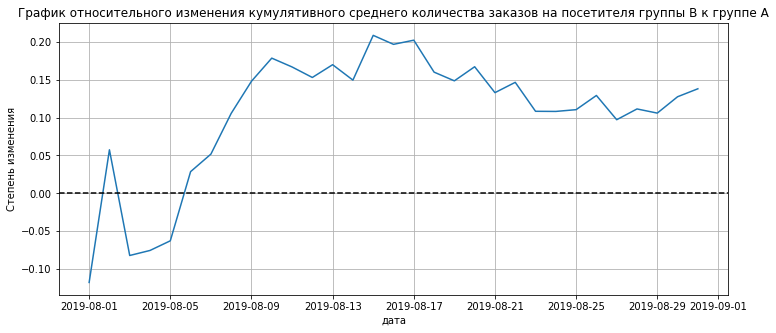

In [376]:
# собираем данные в одном датафрейме
mergedCumulativeVisitors = cumulativeVisitorsA.merge(cumulativeVisitorsB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeVisitors['date'], (mergedCumulativeVisitors['count_transactionsB']/mergedCumulativeVisitors['visitorsB'])/(mergedCumulativeVisitors['count_transactionsA']/mergedCumulativeVisitors['visitorsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A');
plt.xlabel('дата');
plt.grid()
plt.ylabel('Cтепень изменения');

<b>Микровывод: </b> График B стабильно превосходит. Соотношение двух графиков стабилизировалось на уровне 0.10-0.15. Вряд ли стоит ожидать каких-то серьезных изменений. Данный график также подтверждает ранее выдвинутую гипотезу о повышенной конверсии группы B по сравнению с группой A.

### Строим и анализируем точечный график количества заказов по пользователям. 

In [377]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10) 

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


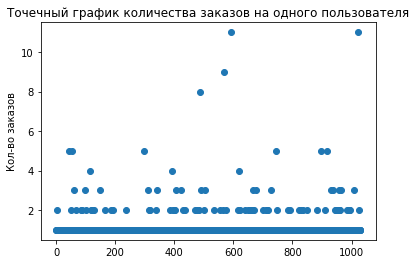

In [378]:
x_values = pd.Series(range(0,len(ordersByUsers['visitor_id'])))

plt.scatter(x_values, ordersByUsers['orders']);
plt.title('Точечный график количества заказов на одного пользователя');
plt.ylabel('Кол-во заказов');

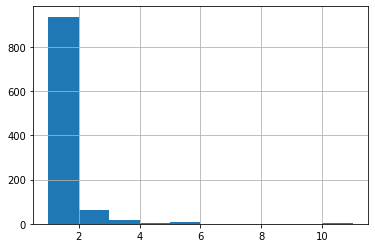

In [379]:
#для понимания природы распределения построим гистограмму
ordersByUsers['orders'].hist();

Гистограмма демонстрирует наличие существенных выбросов

<b>Микровывод: </b> Большинство пользователей сделали лишь по одному заказу. Однако немалая часть сделала по 2-3 заказа. Отдельные индивиды делали более 3 заказов.

### Считаем 95-й и 99-й перцентили количества заказов на пользователя и обозначаем границу для определения аномальных пользователей

In [380]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

95% пользователей делала 1-2 заказа. Разумно выбрать 3 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

### Строим и анализируем точечный график стоимостей заказов

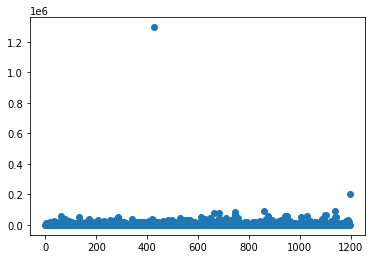

In [381]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

Видим, что один аномальный выброс мешает нам увидеть остальной график. Поэтому построим еще один, ограничив верхнюю границу

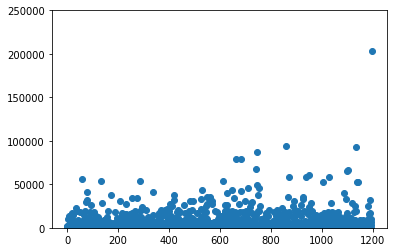

In [382]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.ylim(0,250000);

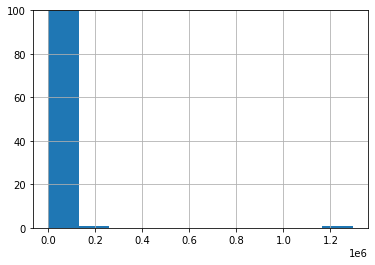

In [383]:
#для понимания природы распределения построим гистограмму
orders['revenue'].hist();
plt.ylim(0, 100);

Гистограмма также подтверждает существенные выбросы

<b>Микровывод: </b> Распределение явно не нормальное, с огромным хвостом, скорее всего. Замечаем, что подавляющее большинство заказов стоит не более 50000. Выбросы превышают данную сумму. Два заказа - крайне дорогие (на 200 тыс. и на 1.3 миллиона). Возможно, именно они попали в группу B и исказили общую статистику.

 ### Считаем 95-й и 99-й перцентили стоимости заказов и обозначаем границу для определения аномальных заказов

In [384]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

95% заказов составляют сумму, не превышающую 28 тыс. Разумно выбрать именно ее за верхнюю границу суммы заказа, и отсеять аномальные заказы по ней.

### Считаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Для этого мы используем тест Манна-Уитни, так как имеем распределения с большими хвостами. Именно тест Манна-Уитни благодаря ранжированию нейтрализует негативный эффект выбросов, которые, как мы выяснили по гистограммам, довольно существенны.

Посчитаем статистическую значимость различий в среднем числе заказов на посетителя по «сырым» данным — без удаления аномальных пользователей.
Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitor_id', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [385]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.


In [386]:
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(visits[visits['group']=='A']['visitors']\
        .sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
  

In [387]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visitors']\
    .sum()- len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [388]:
#применяем критерий Манна-Уитни для двух выборок
alpha = 0.05  #берем 5% за уровень значимиости

if st.mannwhitneyu(sampleA, sampleB)[1]<=0.05:
    print('Отвергаем нулевую гипотезу об отсутствие различий между средним кол-во заказов двух групп')
else:
    print('Оставляем нулевую гипотезу')
print(st.mannwhitneyu(sampleA, sampleB)[1])

Отвергаем нулевую гипотезу об отсутствие различий между средним кол-во заказов двух групп
0.016792355056752608


<b> Микровывод: </b> Тест Манна-Уитни выдает низкий уровень значимости, то есть вполне логично отклонить гипотезу об отсутствие различий между средним кол-вом заказов в двух группах. Хотя если бы мы взяли p-value 1%, то нулевая гипотеза бы осталась.

### Считаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между двумя группами по «сырым» данным — без удаления аномальных заказов.
Сформулируем гипотезы. Нулевая: различий в среднем чеке между группами нет. Альтернативная: различия в среднем чеке между группами есть.

Создадим две выборки SampleCheckA и SampleCheckB, содержащие стоимости заказов двух групп

In [389]:
sampleCheckA=orders[orders['group']=='A']['revenue']

In [390]:
sampleCheckB = orders[orders['group']=='B']['revenue']

In [391]:
#применяем критерий Манна-Уитни для двух выборок
alpha = 0.05  #берем 5% за уровень значимиости

if st.mannwhitneyu(sampleCheckA, sampleCheckB)[1]<=0.05:
    print('Отвергаем нулевую гипотезу об отсутствие различий между средними чеками двух групп')
else:
    print('Оставляем нулевую гипотезу')
print(st.mannwhitneyu(sampleCheckA, sampleCheckB)[1])

Оставляем нулевую гипотезу
0.7292909855432458


<b> Микровывод: </b> Тест Манна-Уитни однозначно свидетельствует об отсутствие различий между средними чеками двух групп даже с учетом выбросов. 

### Считаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Посчитаем статистическую значимость различий в среднем числе заказов на посетителя по «очищенным» данным, удалив аномальных пользователей. Напомним, что аномальными считаются пользователи, сделавшие 3 заказа и более и заказы с чеком более 28000. Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

Но сначала необходимо обозначить аномальных пользователей

In [392]:
#пользователи с аноальным кол-вом заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= 3]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] >= 3]['visitor_id'],
    ],
    axis=0,
)
#пользователи с аномальными чеками
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']

#объединяем
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64
74


Всего 74 аномальных пользователя

In [393]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]\
        ['orders'], pd.Series(0, index=np.arange(visits[visits['group']=='A']['visitors']\
        .sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

In [394]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]\
        ['orders'], pd.Series(0, index=np.arange(visits[visits['group']=='B']['visitors']\
        .sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

In [395]:
#применяем критерий Манна-Уитни для двух выборок
alpha = 0.05  #берем 5% за уровень значимиости

if st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]<=0.05:
    print('Отвергаем нулевую гипотезу об отсутствие различий между средним кол-во заказов двух групп')
else:
    print('Оставляем нулевую гипотезу')
print(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])

Отвергаем нулевую гипотезу об отсутствие различий между средним кол-во заказов двух групп
0.013042592743036745


<b> Микровывод:</b> Отсутствие выбросов еще более обозначило отличие средних двух групп. Теперь можно еще более уверенно говорить об объективном существовании различия между двумя группами.

### Считаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между двумя группами по «очищенным» данным, удалив аномальные заказы. Напомним, что аномальными считаются пользователи, сделавшие 3 заказа и более и заказы с чеком более 28000.
Сформулируем гипотезы. Нулевая: различий в среднем чеке между группами нет. Альтернативная: различия в среднем чеке между группами есть.

In [396]:
sampleCheckAFiltered = orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue']

In [397]:
sampleCheckBFiltered = orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue']

In [398]:
#применяем критерий Манна-Уитни для двух выборок
alpha = 0.05  #берем 5% за уровень значимиости

if st.mannwhitneyu(sampleCheckAFiltered, sampleCheckBFiltered)[1]<=0.05:
    print('Отвергаем нулевую гипотезу об отсутствие различий между средними чеками двух групп')
else:
    print('Оставляем нулевую гипотезу')
print(st.mannwhitneyu(sampleCheckAFiltered, sampleCheckBFiltered)[1])

Оставляем нулевую гипотезу
0.738481751314565


<b> Микровывод:</b> Тест Манна-Уитни с очищенными выборками подтвердил ранее принятый вывод об отсутствие серьезных различий между чеками двух групп.Скорее всего, это связано с удалением тех заказов, которые стали причиной увеличения кумулитивного среднего чека после 17ого августа (то что мы видели на графике выше). То есть группа B превосходит группу A именно кол-вом заказов на одного посетителя, а не их дороговизной.


### Вывод

Принимаем следуещее решение: Останавливаем A/B-тест, зафиксировав победу группы B в конверсии по следующим причинам:

    1)График средних чеков засвидетельствовал попадание серьезных выбросов после 17 августа в группу B, благодаря чему кумулитивный средний чек группы B надолго превзошел средний чек группы A. Однако тест Манна-Уитни, который процесс ранжирования нейтрализует пагубное влияние выбросов, выдал уровень значимости, согласно которому нельзя с уверенностью говорить о серезных различиях между двумя группами чеков. Данный тест с очищенными данными лишь еще раз подтвердил выводы первого. По двум тестам мы имеем довольно однозначный уровень значимости - это еще один довод в пользу остановки теста. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. Исходя из вышесказанного, делаем вывод об отсутствие различий между средними чеками двух групп, несмотря на график.
    
     2)Абсолютно другая история со средним числом заказов на одного посетителя. Тест Манна-Уитни с "сырыми" данными и с "очищщенными" выдает довольно низкий уровень значимости, исходя из чего мы отвергаем гипотезу о равенстве кол-ва заказов на одного посетителя между двумя группами. Такой вывод подтверждает график, который также однозначно свидетельствует о наличие серьезных различий при отстуствие каких-либо значимых флуктуаций. Однозначность результатов теста Манна-Уитни и графика также доказывает нам бесполезность продолжения A/B теста.
     
     Таким образом, группа B превосходит группу A в кол-ве заказов на одного пользователя, однако группы равны в среднем чеке. Можно уверенно говорить, что изменения на сайте интернет-магазина привели к положительным изменениям, исходя из чего рекомендую принять нововведения.